# Ručně psané číslice

**Cíl:** 

Provedeme PCA s cílem analyzovat strukturu dat. Konkrétně se zaměříme na shluky v datasetu ručně psaných číslic


`scikit-Learn` obsahuje několik datasetů. My se blíže zaměříme na dataset `digits`, který obsahuje obrázky ručně psaných číslic, reprezentovaných maticí $8 \times 8$ (resp. $64$ rozměrným vektorem) pixelů v 16ti stupních šedi. Navíc jsou všechny obrázky olabelované hodnotou číslic, které jsou na nich napsané. Dataset lze načíst funkcí `load_digits`, která vrací dictionary.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation (so 0.000 is printed as 0.)


# Načtení datasetu digits
from sklearn.datasets import load_digits
digits = load_digits()
# Obrázky jsou uložené v `digits.data' a příslušné labely v `digits.target`:
X_digits, y_digits = digits.data, digits.target
print(digits.keys())
print('Rozměry datasetu:', X_digits.shape)
print('Maximální hodnota:', X_digits.max(), '\tMinimální hodnota:', X_digits.min())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Rozměry datasetu: (1797, 64)
Maximální hodnota: 16.0 	Minimální hodnota: 0.0


In [ ]:
print(digits.DESCR)

#### Pojďme si data prohlédnout:

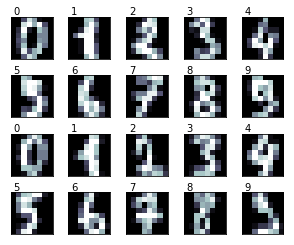

In [2]:
n_row, n_col = 4, 5

def print_digits(images, y, max_n=10):
    fig = plt.figure(figsize=(n_col, n_row))
    fig.subplots_adjust(hspace = 0.4)
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap='bone', interpolation='nearest')
        # Label obrázku podle skutečné hodnoty zobrazené číslice:
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, y_digits, max_n=20)

#### PCA s 10 komponentami

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)
for i, explained_variance_ratio in enumerate(pca.explained_variance_):
    print("Rozptyl vysvětlený " + str(i + 1) + ". hlavní komponentou: ","%.1f" % explained_variance_ratio, '\tPodíl z celku: ', "%.2f" % pca.explained_variance_ratio_[i])

Rozptyl vysvětlený 1. hlavní komponentou:  179.0 	Podíl z celku:  0.15
Rozptyl vysvětlený 2. hlavní komponentou:  163.7 	Podíl z celku:  0.14
Rozptyl vysvětlený 3. hlavní komponentou:  141.8 	Podíl z celku:  0.12
Rozptyl vysvětlený 4. hlavní komponentou:  101.1 	Podíl z celku:  0.08
Rozptyl vysvětlený 5. hlavní komponentou:  69.5 	Podíl z celku:  0.06
Rozptyl vysvětlený 6. hlavní komponentou:  59.1 	Podíl z celku:  0.05
Rozptyl vysvětlený 7. hlavní komponentou:  51.9 	Podíl z celku:  0.04
Rozptyl vysvětlený 8. hlavní komponentou:  44.0 	Podíl z celku:  0.04
Rozptyl vysvětlený 9. hlavní komponentou:  40.3 	Podíl z celku:  0.03
Rozptyl vysvětlený 10. hlavní komponentou:  37.0 	Podíl z celku:  0.03


## 1. Použití PCA pro kompresi obrázků

K přechodům tam a zpět mezi projekcí a původní reprezentací můžeme využít metody `transform` a `inverse_transform`.

In [4]:
X_reduced = pca.transform(X_digits) # Transformuje data do projektovaného prostoru 10 hlavních komponent
print('Rozměry transformovaných dat:', X_reduced.shape)
print('Rozměry původních dat:', X_digits.shape)

Rozměry transformovaných dat: (1797, 10)
Rozměry původních dat: (1797, 64)


In [5]:
X_recovered = pca.inverse_transform(X_reduced) # Přetransformujme data zpět do původního prostoru 
print('Rozměry obnovených dat:', X_recovered.shape)

Rozměry obnovených dat: (1797, 64)


Reconstructed data


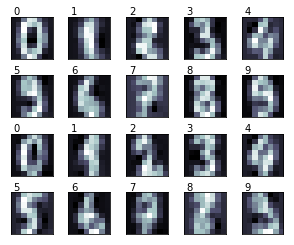

In [6]:
images_recovered = X_recovered.reshape(X_recovered.shape[0],8,8) # Reshape a bit (to plot it)
print_digits(images_recovered, y_digits, max_n=20)
print("Reconstructed data")

((1797, 10), (1797, 64))

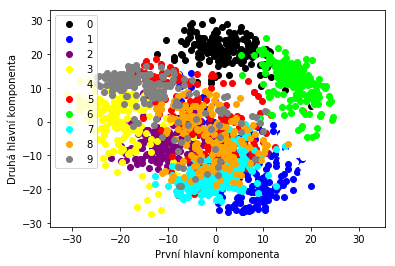

In [7]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
        plt.legend(digits.target_names)
        plt.xlabel('První hlavní komponenta')
        plt.ylabel('Druhá hlavní komponenta')
        
n_components=2
plot_pca_scatter()
X_pca.shape, X_digits.shape

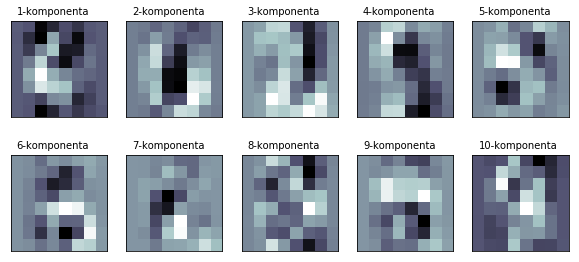

In [8]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        if i <= n_col * n_row:
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(comp.reshape((8, 8)), interpolation='nearest', cmap='bone')
            plt.text(0, -1, str(i + 1) + '-komponenta')
            plt.xticks(())
            plt.yticks(())
        else:
            break
        
print_pca_components(pca.components_, 5, 2)

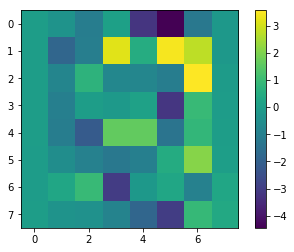

In [9]:
# Podívejme se na rozdíl mezi originálním a komprimovaným obrázkem pro první obrázek
plt.show()
plt.imshow((X_digits[0,:] - X_recovered[0,:]).reshape(8,-1), interpolation='nearest')
plt.colorbar()

#### Kvalitu té rekonstrukce můžeme měřit pomocí MSE (mean square error)
$$\text{MSE} = \frac{1}{N}\sum_{i=1}^N (x_i - \tilde x_i)^2.$$

In [10]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(X_digits, X_recovered))

MSE: 4.914301185179872


In [11]:
print('Podíl vysvětleného rozptylu prvními 10 komponentami:', "%.3f" % np.sum(pca.explained_variance_ratio_))

Podíl vysvětleného rozptylu prvními 10 komponentami: 0.738


* Takže cca 74% rozptylu v datech je vysvětleno prvními 10 komponentami. 
* Průměrná chyba rekonstrukce je cca $5$, což je stejné, jako kdyby se v průměrném případě lišila v 5ti pixelech hodnota stupně šedi o 1. 

**To není špatné!**

### Úkol 1:

* Jak závisí tato chyba rekonstrukce (měřená pomocí MSE) na počtu komponent?
How does the reconstruction error depend on the number of components? 
* Jak je to pro jednotlivé třídy (číslice)? Je nějaká číslice obtížněji rekonstruovatelná?

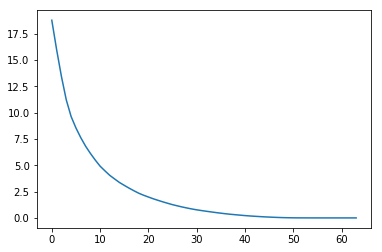

In [16]:
### Your code here
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

component_data = []

for i in range(64):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_digits)

    X_reduced = pca.transform(X_digits) 
    X_recovered = pca.inverse_transform(X_reduced)

    component_data.append( mean_squared_error(X_digits, X_recovered))

plt.plot(np.arange(0,64),component_data)
plt.show()

In [19]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)

X_reduced = pca.transform(X_digits) 
X_recovered = pca.inverse_transform(X_reduced)

component_data.append( mean_squared_error(X_digits, X_recovered))

for i in range(1):
    print ( X_pca[y_digits == i] )

[[ -1.25948  21.27489  -9.46292 ...   2.55224  -0.57894   3.6575 ]
 [ 11.21512  16.91988 -10.06692 ...  -7.12048   0.37812   6.53988]
 [  6.43539  19.47714 -10.20352 ...  -4.1255    3.05822  -2.85031]
 ...
 [ -1.45805  18.03138   1.40239 ...   7.13234   2.64128  -3.07624]
 [ 10.04179  17.00486   8.57342 ...  -1.37097   4.59841   1.39911]
 [  6.46456  20.56729  -9.15511 ...  -3.75669  -7.19556  -5.24434]]


## 2. Využití redukce dimenzionality k vylepšení schopnosti predikce modelu

Obvyklé využití PCA (případně SVD) spočívá v projekci dat do nižší dimenze a následném trénování modelu na těchto projektovaných datech. Přitom doufáme, že to povede (a často to tak je) k vylepšení kvality modelu.

V našem případě budeme trénovat model na datech `X_reduced` s cílovou proměnnou v `y_digits`.

### Úkol 2: 

* Porovnejte schopnost predikce modelu logistické regrese natrénovaného na originálních datech oproti stejnému modelu natrénovanému na PCA redukovaných datech. 
* Jaký je vliv počtu použitých hlavních komponent? 
* Vykreslete závislost chyby modelu na počtu komponent.

In [21]:
### Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

clf = LogisticRegression()
clf.fit(X_digits,y_digits)

print( mean_squared_error(y_digits, clf.predict(X_digits)) )

for i in range(10):



0.22815804117974403


### Úkol 3: 

* Zkusme použít ne-lineární metodu redukce dimenzionality - LLE. 
* Ověřte, zda v tomto případě dojde k vylepšení. 

Můžete využít `LLE` (známe z přednášky) pomocí následujícího kódu:

In [14]:
### Metoda LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=15, n_neighbors=5)
Xlle = lle.fit_transform(X)


### Your code here

NameError: name 'X' is not defined